In [ ]:
# Dataset consists of 569 observations in which we are going to predict whether a applicant
# is eligible for a loan or not based on financial, demographic and credit factors

# Going to use decision trees to classify applicants as eligible or not eligible

# Consists of 13 variables ( 12 features and 1 target)
# Customer_ID	Unique identifier for each loan applicant

# Gender	Gender of the applicant	Male / Female

# Married	Marital status of the applicant	Yes / No

# Dependents	Number of dependents	0, 1, 2, 3

# Education	Education level of the applicant	Graduate / Not Graduate

# Self_Employed	Whether the applicant is self-employed	Yes / No

# Applicant_Income	Applicant’s monthly income	5000

# Coapplicant_Income	Coapplicant’s monthly income	1500

# Loan_Amount	Loan amount requested (in thousands)	128

# Loan_Amount_Term	Loan repayment term (in months)	360

# Credit_History	Credit history meets lending criteria (1 = Yes, 0 = No)	1

# Property_Area	Type of property area	Urban / Semiurban / Rural

# Loan_Status	Loan approved or not (target variable)	Y / N

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load data
df = pd.read_csv("Loan Eligibility Prediction.csv")

In [3]:
# Let's view first few rows of dataset
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [4]:
# Check the contents/structure of the data
df.info()

# We have 7 numeric  and 5 object datatypes including Loan_status (target)

# Get the shape of data
df.shape

# We have 614 rows (observations) and 13 variables (columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


(614, 13)

In [4]:
# Let's convert object datatypes to character types
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [6]:
# Check structure to see if object columns are not categorical datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_ID         614 non-null    int64   
 1   Gender              614 non-null    category
 2   Married             614 non-null    category
 3   Dependents          614 non-null    int64   
 4   Education           614 non-null    category
 5   Self_Employed       614 non-null    category
 6   Applicant_Income    614 non-null    int64   
 7   Coapplicant_Income  614 non-null    float64 
 8   Loan_Amount         614 non-null    int64   
 9   Loan_Amount_Term    614 non-null    int64   
 10  Credit_History      614 non-null    int64   
 11  Property_Area       614 non-null    category
 12  Loan_Status         614 non-null    category
dtypes: category(6), float64(1), int64(6)
memory usage: 38.0 KB


In [5]:
# Check to see if there are any missing values in the dataset
print(df.isnull().sum())

# There are 0 missing values in the dataset

# Check to see if there are any duplicate observations
print(df.duplicated().sum())

# There are 0 duplicate observations 

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64
0


In [13]:
# view summary statistics for numeric variables
df.describe().round(2)

# Customer ID is not important, just an identifier

# Dependents: average amount of dependents is 0.86 with dependents ranging from 0 to 4
# Applicant Income: average income is 5,403.46 with income ranging from 150.0 to 81000.0
# Coapplicant Income: average income is 1,621.25 with income ranging from 0 to 41,667
# Loan Amount: average loan amount is 142.02 with amounts ranging from 9 to 700
# Loan Amount Term: average loan payment/month is 338.89 with payments ranging from 12 to 480
# Credit History: just 1 or 0  

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.00,614.00,614.00,614.00,614.00,614.00,614.00
mean,307.50,0.86,5403.46,1621.25,142.02,338.89,0.85
std,177.39,1.22,6109.04,2926.25,87.08,69.72,0.36
min,1.00,0.00,150.00,0.00,9.00,12.00,0.00
25%,154.25,0.00,2877.50,0.00,98.00,360.00,1.00
50%,307.50,0.00,3812.50,1188.50,125.00,360.00,1.00
75%,460.75,2.00,5795.00,2297.25,164.75,360.00,1.00
max,614.00,4.00,81000.00,41667.00,700.00,480.00,1.00


In [6]:
# View counts for object variables
for col in df.select_dtypes(include=['category']).columns:
    print(df[col].value_counts())

# Gender: 499 out of 614 (81.27%) are Male while remaining 28.73% are Female
# Married: 399 are married
# Education: 480 out of 614 graduated
# Self_employed: Out of 614, 523 are not self employeed
# Property_Area: SemiUrban had the most at 233 followed by Urban with 202 and the remaining 179 to Rural
# Loan_status: 422 out of 614 () were eligible for loan while 192 were not

Gender
Male      499
Female    115
Name: count, dtype: int64
Married
Yes    399
No     215
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     523
Yes     91
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


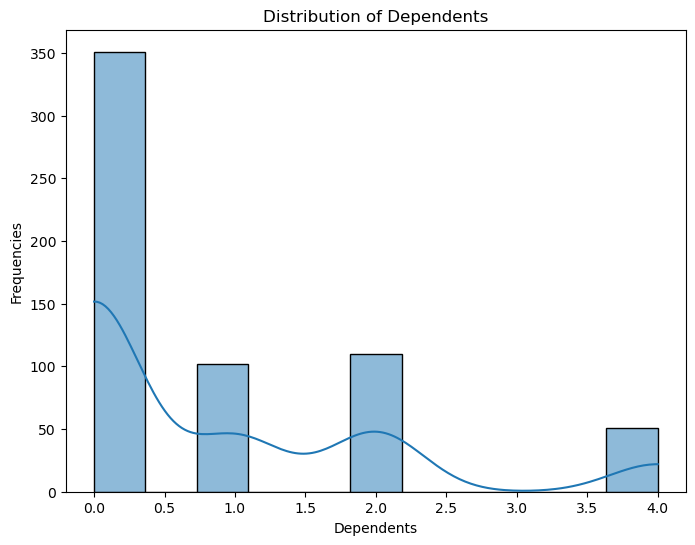

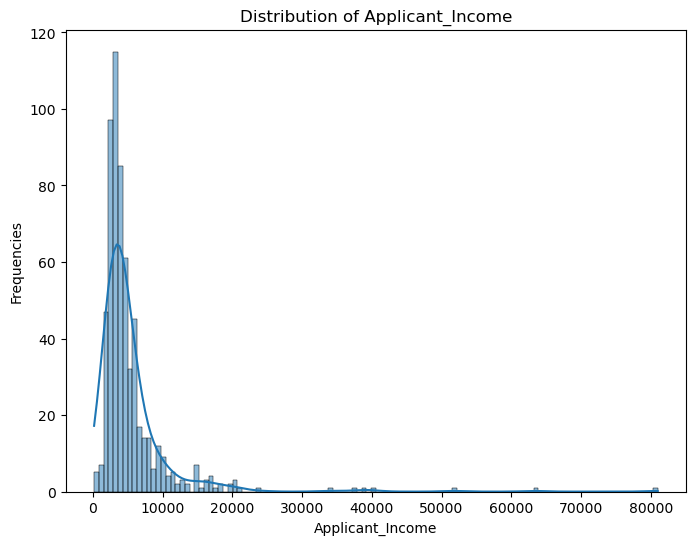

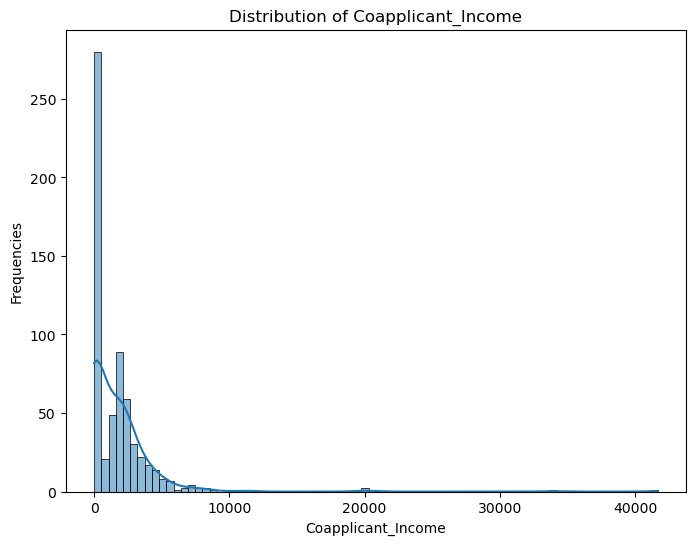

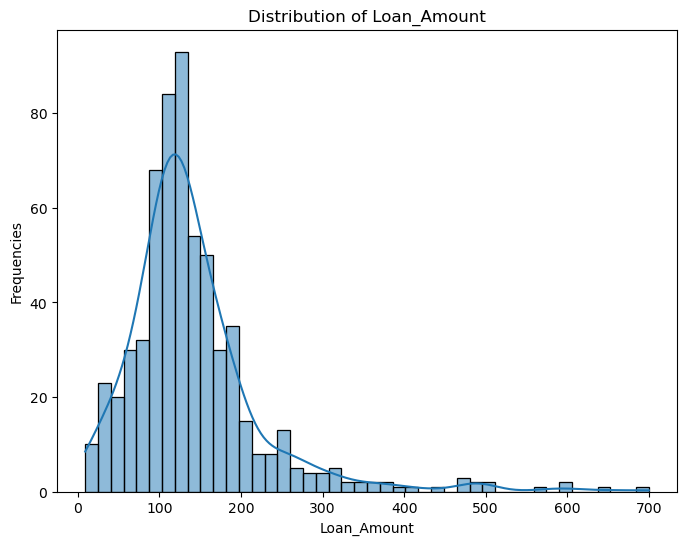

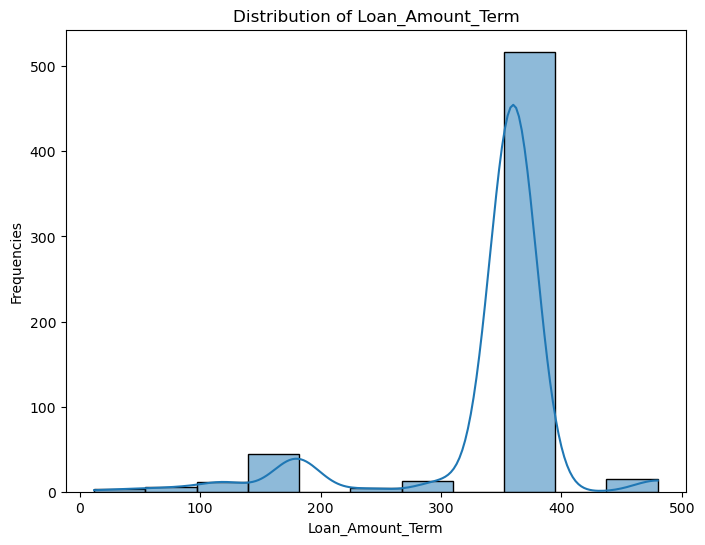

In [ ]:
# Let's Analyze the distributions and boxplots of numerical columns except customer id
num_cols = ["Dependents", "Applicant_Income", "Coapplicant_Income", "Loan_Amount", "Loan_Amount_Term"]

for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequencies')
    plt.show()

# Dependents: We see that majority of the customers have 0 dependents 
# Applicant Income: Distribution is positively skewed majority of income is between $0 to $100,000
# Coapplicant Income: Distribution is positively skewed with most values between $0 to $100,000
# also majority of Coapplicants incomes are $0
# Loan_Amount: Also positively skewed with majority of Loan amounts from $0 to $200.
# Loan Amount Term: Majority of the term is $ 400.

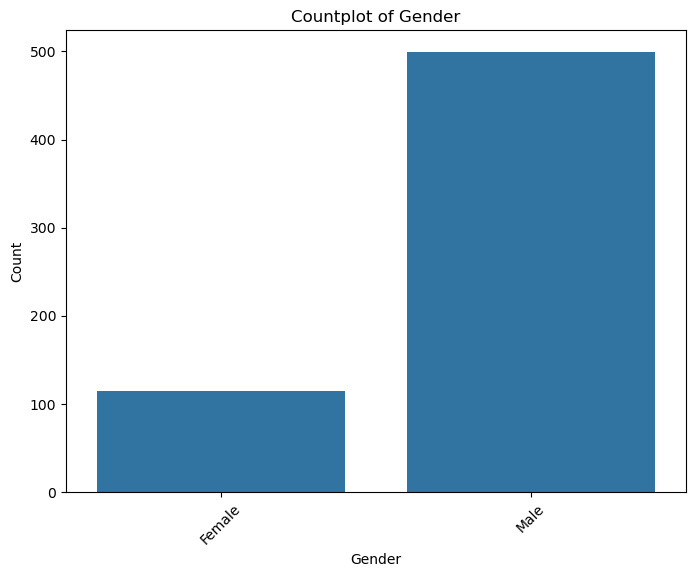

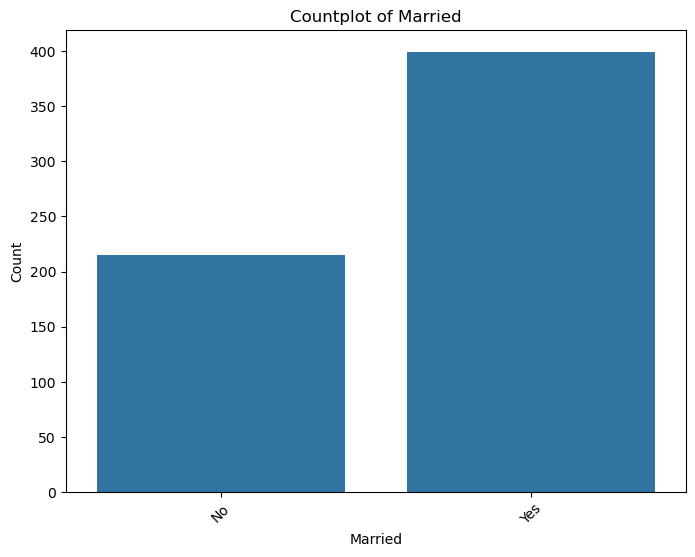

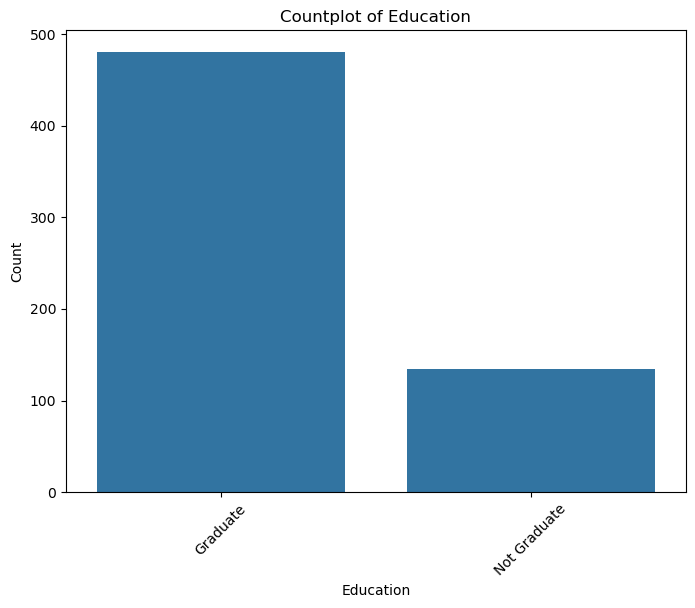

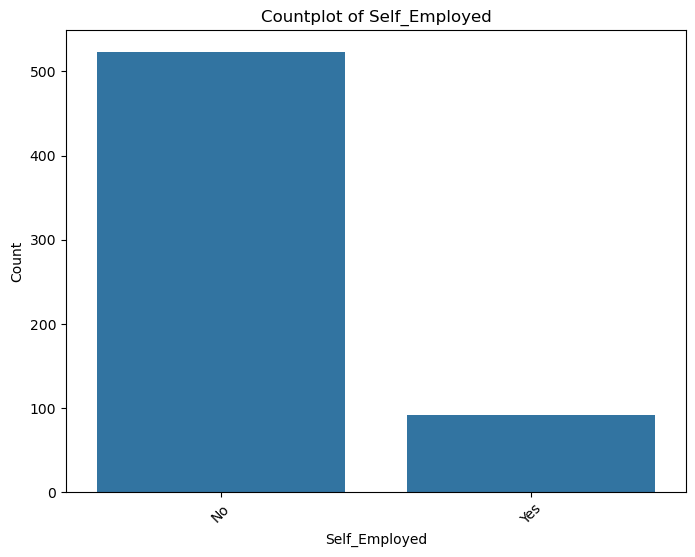

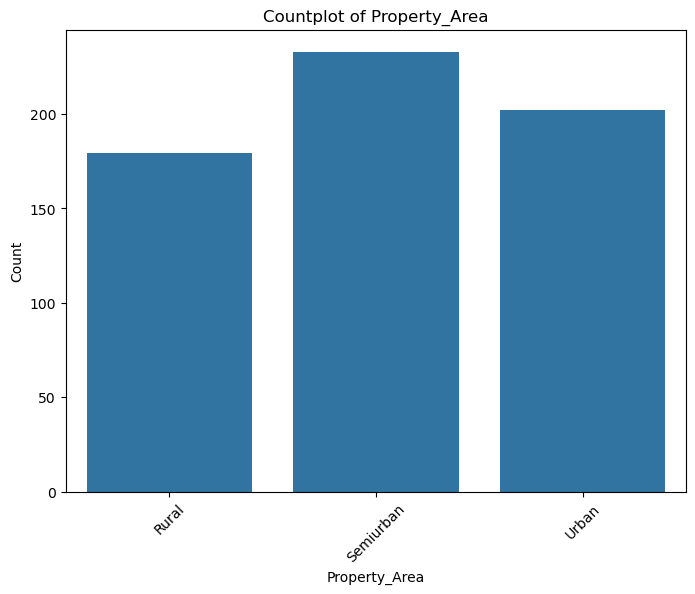

In [ ]:
# Let's look at bar charts/ count plots of categorical variables
cat_cols = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]

for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x = col)
    plt.title(F"Countplot of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

# From Barplots we see that:
# Gender: Majority of customers are male
# Married: Majority of customers are married
# Education: Majority of customers graduated/ has education
# Self Employed: Majority of customers are not self employed
# Property Area: More customes live in semi-urban areas followed by urban then rural.

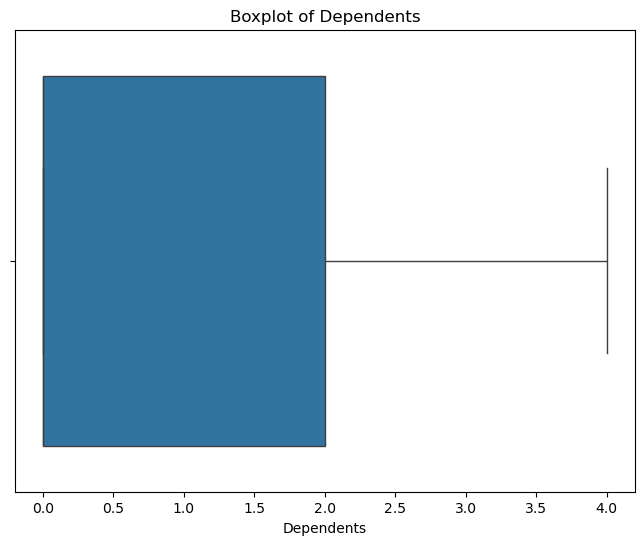

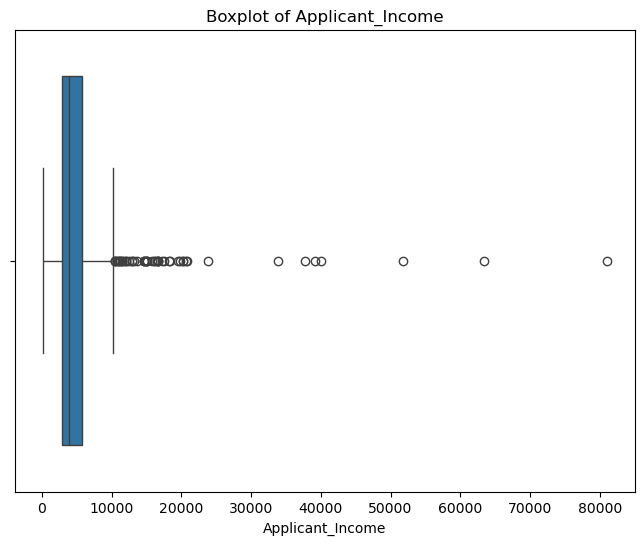

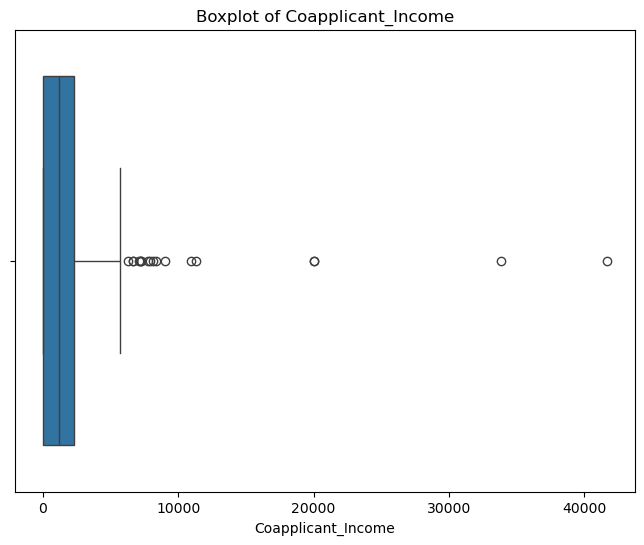

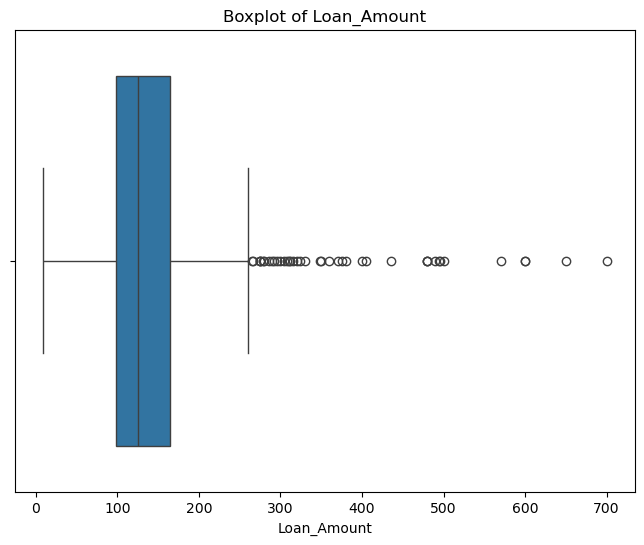

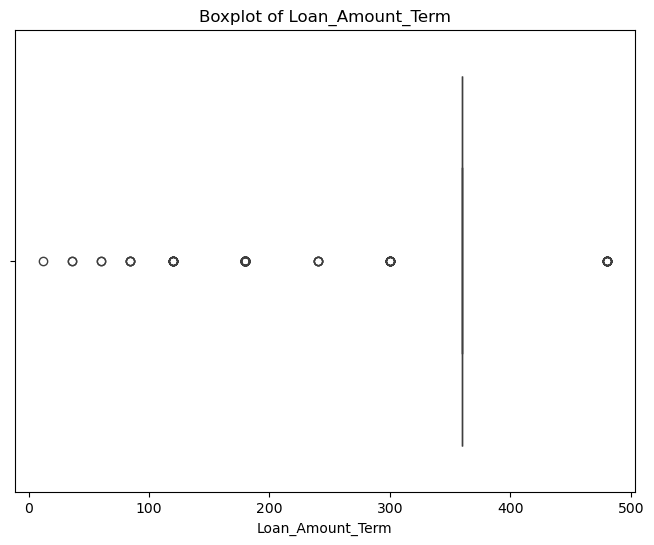

In [ ]:
# Check for any outliers in dataset
# Use of boxplots 

for col in num_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Applicant Income, Coapplicant Income, Loan Amount and Loan Amount Term have a lot of outliers
# based on boxplots

<Figure size 1000x800 with 0 Axes>

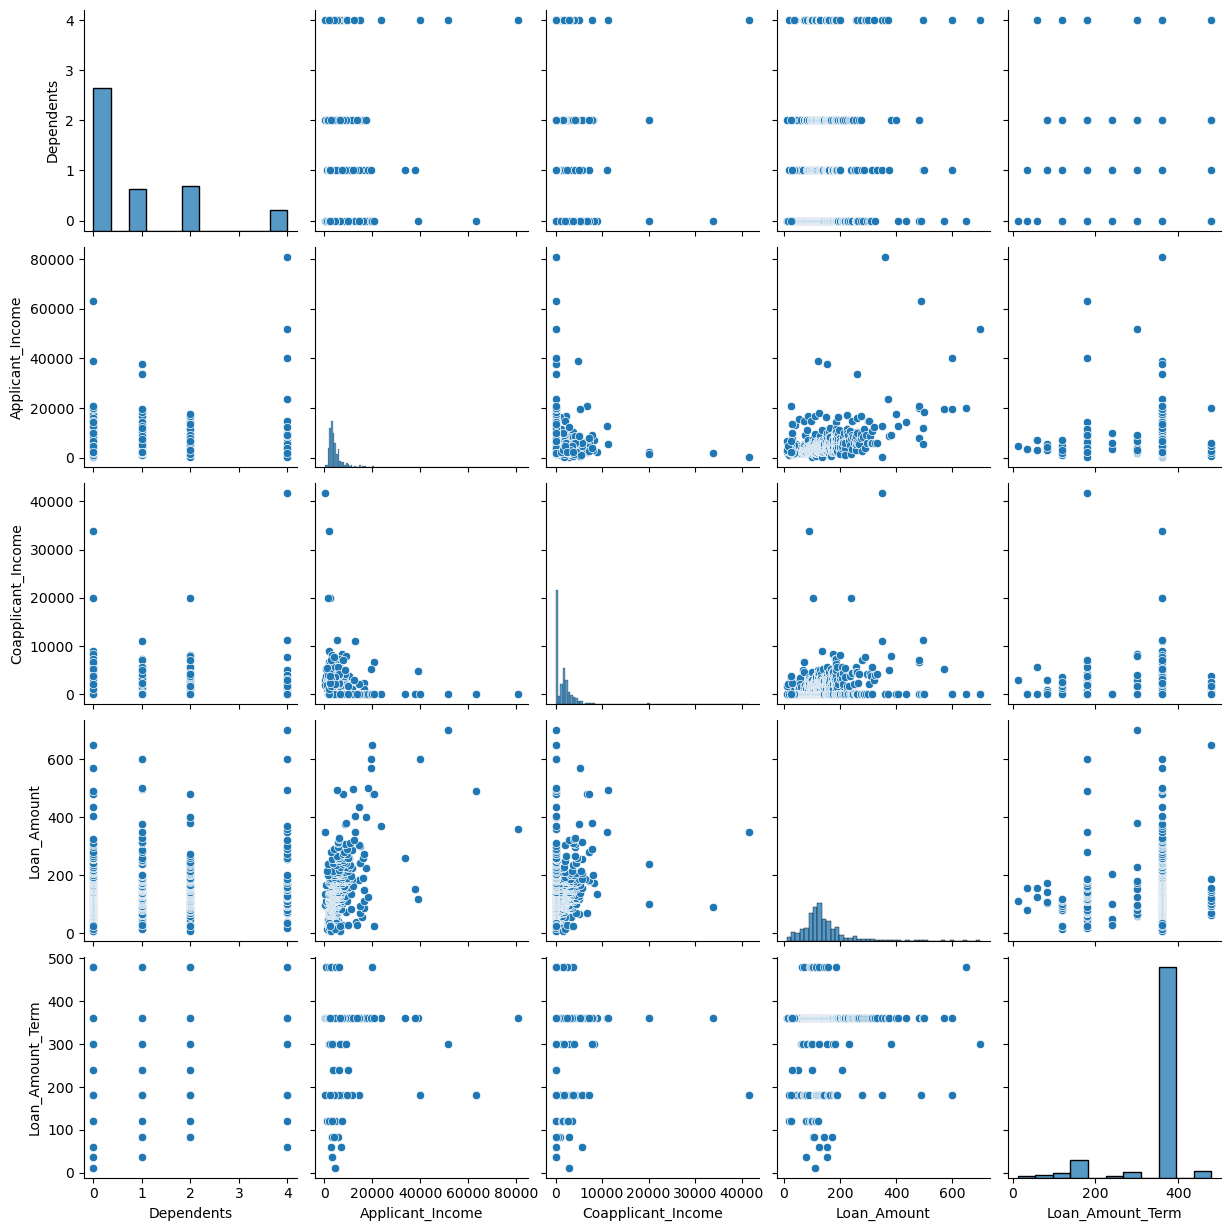

In [50]:
# Look at correlation of numerical variables

# Create a Matplotlib figure with a specific size
plt.figure(figsize=(10, 8))

# Scatterplot matrix
sns.pairplot(df[num_cols].dropna())
plt.show()

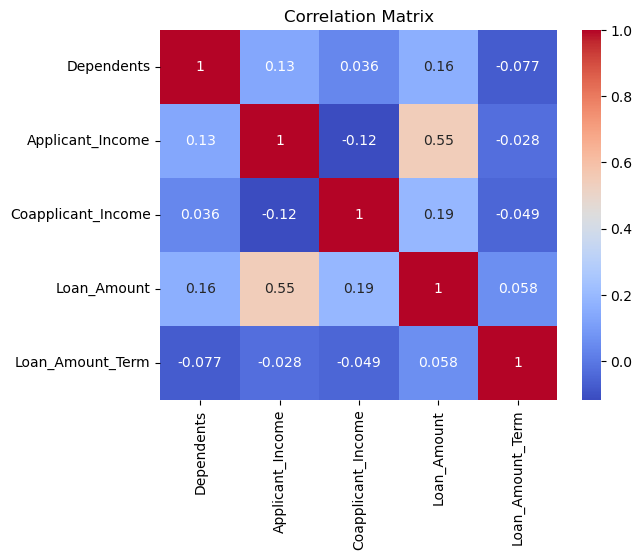

In [ ]:
# Let's look at heatmap of numeric variables
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# From the heatmap we see that applicant income and loan amount have a moderately postive
# correlation of 0.55 suggesting that as applicant income increases, loan amount tends to increase

# other variables are not correlated with each other much

In [7]:
# Let's get ready to perform Decision Tress Classification for Loan Status
# Create copy of original dataframe
df_2 = df.copy()

In [8]:
df_2.head(7)

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
5,148,Male,Yes,1,Graduate,No,1538,1425.0,30,360,1,Urban,Y
6,271,Female,No,0,Graduate,No,3237,0.0,30,360,1,Urban,Y


In [9]:
# Convert categorical variables into numeric format
label_encoders = {}
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    df_2[col] = le.fit_transform(df_2[col].astype(str))
    label_encoders[col] = le

In [10]:
# Check to see if each variable encoded correctly
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    int32  
 2   Married             614 non-null    int32  
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    int32  
 5   Self_Employed       614 non-null    int32  
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    int32  
 12  Loan_Status         614 non-null    int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 48.1 KB


In [11]:
df_2.head(7)

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,0,0,0,0,0,2378,0.0,9,360,1,2,0
1,15,1,1,2,0,0,1299,1086.0,17,120,1,2,1
2,95,1,0,0,1,0,3620,0.0,25,120,1,1,1
3,134,1,1,0,0,1,3459,0.0,25,120,1,1,1
4,556,1,1,1,0,0,5468,1032.0,26,360,1,1,1
5,148,1,1,1,0,0,1538,1425.0,30,360,1,2,1
6,271,0,0,0,0,0,3237,0.0,30,360,1,2,1


In [12]:
# Loan Status: Yes = 1, No = 0
# Get random seed
np.random.seed(42)

# Select all predictor features and exclude customer_id and non-predictive columns
predict_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term',
                'Credit_History', 'Property_Area']


# Doing classification
task = "classification"

# Select Features and Target Cols
X = df_2[predict_cols]
y = df_2['Loan_Status']
model = DecisionTreeClassifier(random_state=42)


In [13]:
# View shape of X and y
print("Shape:", X.shape, y.shape)

# X: 11 predictors
# y: Target


Shape: (614, 11) (614,)


In [14]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y if task=="classification" else None
)

print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# out of the 614, 429 is used for training model and 185 is used for testing model 


Training samples: 429, Testing samples: 185


In [15]:
# Fit Decision Tree Model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Make predictions
y_pred = model.predict(X_test)

In [17]:
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Model has a 74% Accuracy of correctly classifying a customer loan status approved vs. not approved
# this is pretty good for accuracy 



Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.52      0.55        58
           1       0.79      0.83      0.81       127

    accuracy                           0.74       185
   macro avg       0.69      0.68      0.68       185
weighted avg       0.73      0.74      0.73       185



In [18]:
# Let's create dataframe from testing data to see how actual vs predicted looks like
test_df = X_test.copy()
test_df['Actual Loan Status'] = y_test
test_df['Predicted Loan Status'] = y_pred

# This corrects display of dataframe columns
pd.set_option('display.max_columns', None)      # show all columns
pd.set_option('display.width', None)            # don't wrap long lines
pd.set_option('display.max_colwidth', None)     # show full content in each cell
pd.set_option('display.expand_frame_repr', False) 

print("Testing Data with Predictions: ")
test_df.head()

# Could reverse label encoder so that the character columns go back to their original values
# If encoded values were not known

Testing Data with Predictions: 


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Actual Loan Status,Predicted Loan Status
417,1,1,1,1,0,4554,1229.0,158,360,1,2,1,1
401,1,1,0,0,0,3015,2188.0,153,360,1,0,1,1
141,0,1,0,1,0,1928,1644.0,100,360,1,1,1,1
509,1,0,0,0,1,6400,0.0,200,360,1,0,1,0
483,1,1,1,1,0,5333,1131.0,186,360,1,2,1,1


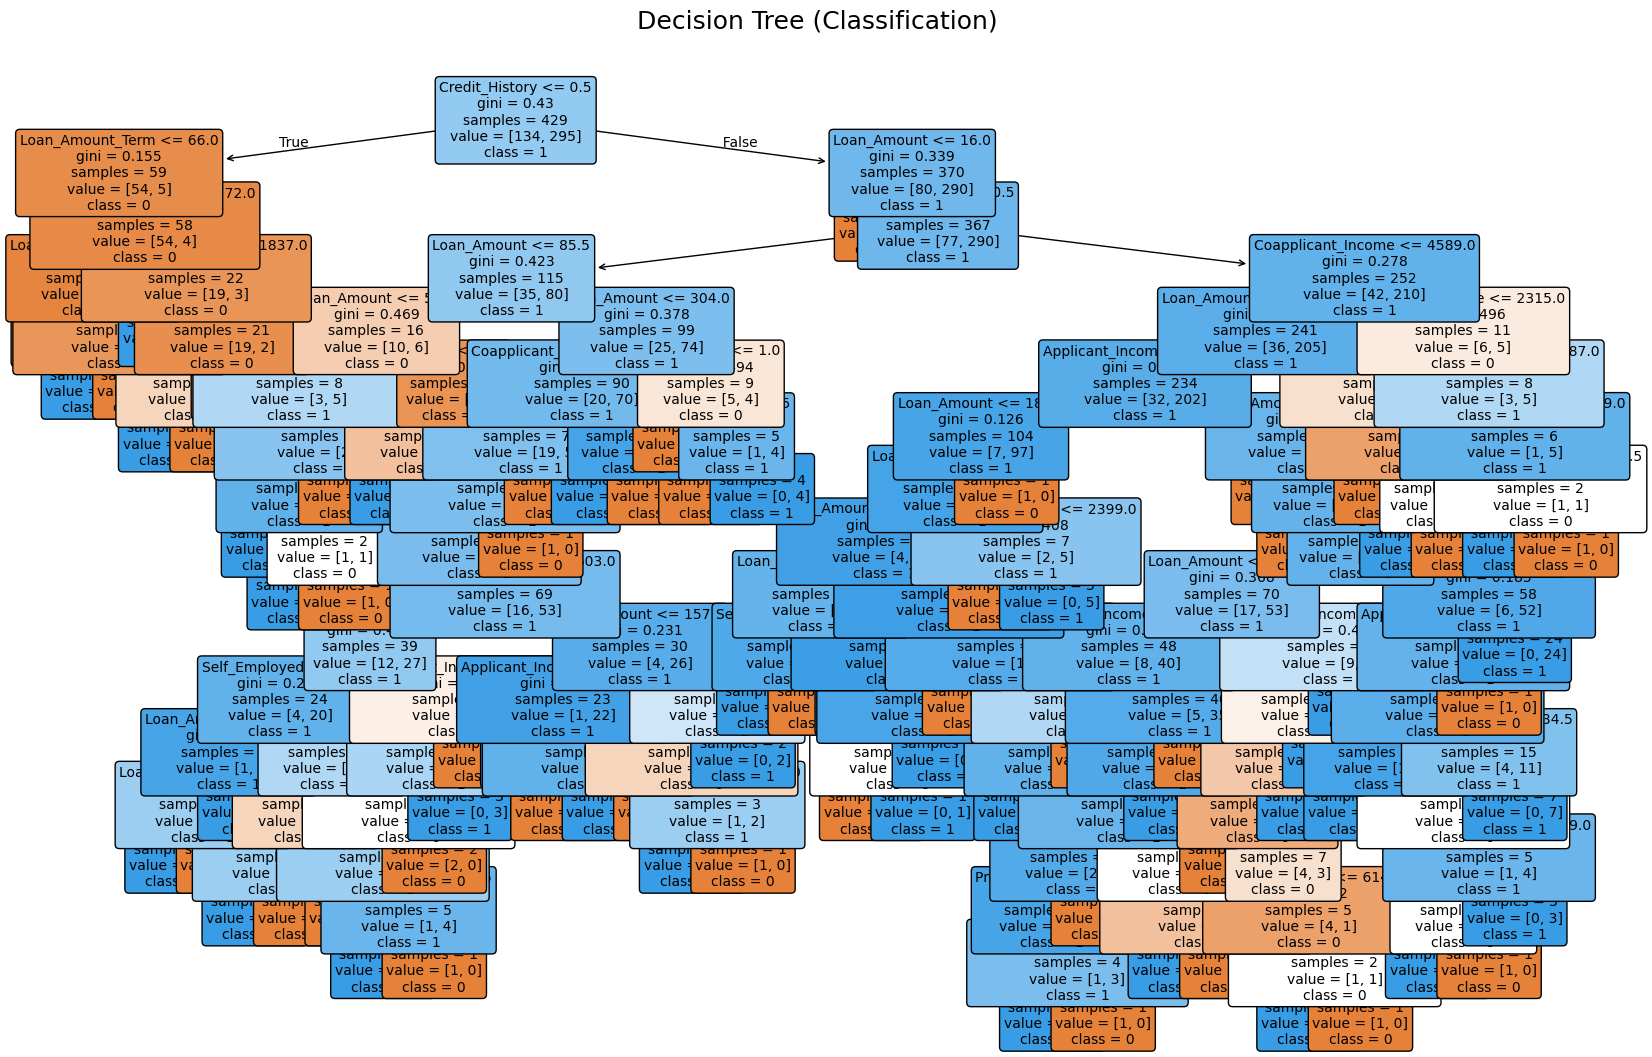

In [47]:
# Visualize Decision Tree
plt.figure(figsize=(20, 12))
plot_tree(
    model,
    feature_names=X.columns,
    class_names = [str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title(f"Decision Tree ({task.capitalize()})", fontsize=18, y=1.06)
plt.subplots_adjust(top=0.90)
plt.show()

In [22]:
# Look at the importance of each feature
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
print('\nFeature Importance:')
print(feat_importance.sort_values(by="Importance", ascending=False))

# We see that Credit History is the most important predictor for Loan status approval
# followed by Loan Amount.

# Gender is the least important predictor for Loan status approval.


Feature Importance:
               Feature  Importance
9       Credit_History    0.269854
7          Loan_Amount    0.224501
5     Applicant_Income    0.171504
6   Coapplicant_Income    0.125860
2           Dependents    0.040664
8     Loan_Amount_Term    0.038931
10       Property_Area    0.037116
4        Self_Employed    0.036134
1              Married    0.029457
3            Education    0.023718
0               Gender    0.002261
